# Customer Segmentation - Diamond Store

As the newly appointed Senior Data Analyst at a diamond shop, the goal of this project is to utilize clustering algorithms to uncover distinct customer personas based on features like age, income, spending score, and savings. Through the selection and comparison of clustering algorithms, the aim is to provide the store owner with actionable insights into the types of customers frequenting the store. 

This involves exploring various preprocessing techniques, hyperparameter values, and distance metrics to measure the performance of each model configuration. The ultimate objective is to identify the most effective clustering algorithm that balances quality results, ease of use, speed, and interpretability. The outcome will not only enhance marketing strategies but also contribute to personalized services and increased customer satisfaction.

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np

## 1.0: Load data

In [ ]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


## 1.1: Clustering Algorithm #1 - K Means

In [ ]:
df1.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

In [ ]:
X = df1.copy()
X_all = df1.copy()
X = X.drop(columns = ['Savings'])

In [ ]:
scaler = StandardScaler()
features = ['Income', 'SpendingScore', 'Age']

# Scaling the data using standard scaler - so that all features input into the clustering model are on the same scale, allowing for accurate distance calculations
X[features] = scaler.fit_transform(df1[features])
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,505.0,6.683323e-17,1.000992,-1.742394,-1.037472,-0.000821,1.077295,1.574888
Income,505.0,-2.814031e-17,1.000992,-1.766355,-1.139805,-0.012106,0.878451,1.849048
SpendingScore,505.0,-2.814031e-16,1.000992,-1.947295,-0.772201,-0.527678,1.014725,1.908103


**Finding the Right Number of Clusters**

The Elbow Method is used to find the right number of clusters. The number of clusters where the silhouette score is the highest, or where the largest drop in inertia is noticed, is the right number of clusters, from the dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

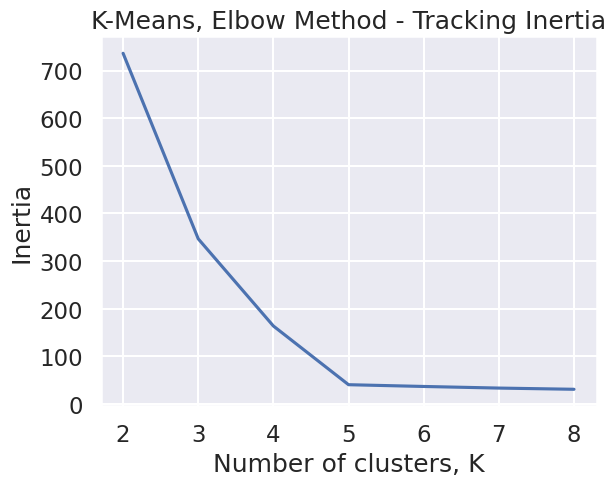

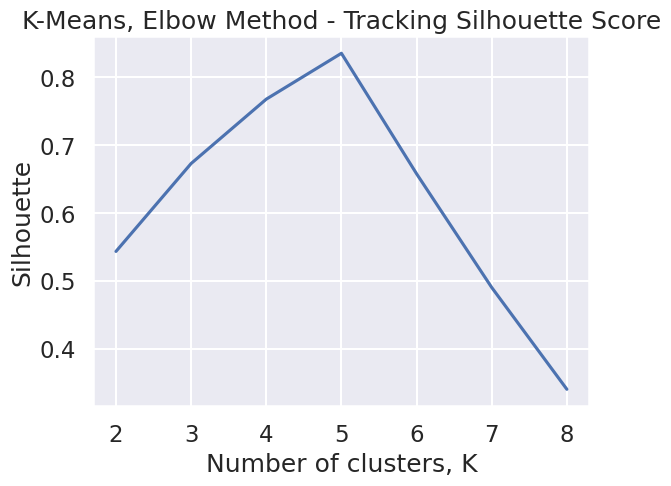

In [ ]:
inertias = {}
silhouettes = {}

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method - Tracking Inertia')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");

plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method - Tracking Silhouette Score')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

The largest drop in inertia or the highest silhouette score is noticed at the 5 cluster mark, indicating there are 5 clusters / customer personas in this dataset.

**Training a Clustering Model with 5 Clusters**

In [ ]:
k_means = KMeans(init='k-means++', n_clusters=5, n_init = 10, random_state=42).fit(X)
k_means_results = k_means.predict(X)
k_means_results = X.assign(Cluster = k_means.labels_)

# Assigning the cluster labels to the original data, so that further analysis can be performed down the line
k_means_results_all_features = X_all.assign(Cluster = k_means.labels_)
k_means_results_all_features.head()

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.829923,2
1,59,81799,0.791082,5417.661426,2
2,62,74751,0.702657,9258.992965,2
3,59,74373,0.765680,7346.334504,2
4,87,17760,0.348778,16869.507130,1


In [ ]:
silhouette_score(X, k_means.labels_)

0.8347896680258566

## 1.2: Clustering Algorithm #2 - Hierarchical Clustering

In [ ]:
agg = AgglomerativeClustering(affinity='euclidean', linkage='ward')
agg.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

**Finding the Right Number of Clusters - Silhouette Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

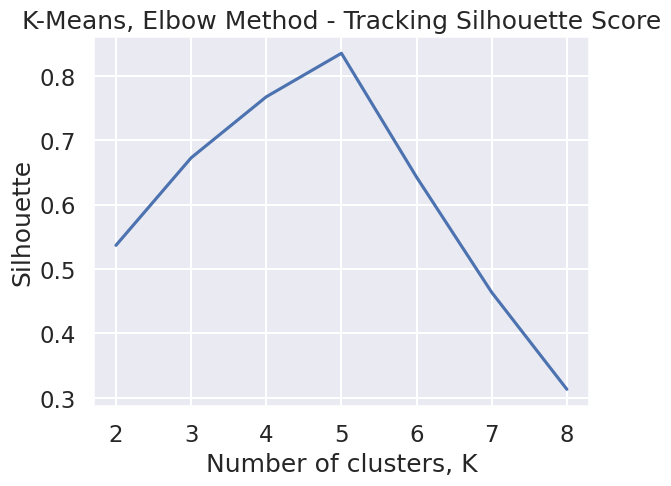

In [ ]:
silhouette_hierarchical = {}

for k in range(2, 9):
    agg = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='ward')
    agg.fit(X)
    silhouette_hierarchical[k] = silhouette_score(X, agg.labels_, metric='euclidean')

plt.figure();
plt.plot(list(silhouette_hierarchical.keys()), list(silhouette_hierarchical.values()));
plt.title('K-Means, Elbow Method - Tracking Silhouette Score')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

The Silhouette score is maximized at 5 clusters, making 5 the right number of clusters / personas for this dataset.

**Training the Hierarchical Clustering Model with 5 Clusters**

In [ ]:
agg = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage='ward')
agg.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [ ]:
silhouette_score(X, agg.labels_)

0.8347896680258566

In [ ]:
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")
hierarchical_results = X.assign(Cluster = labels)
hierarchical_results_all_features = X_all.assign(Cluster = labels)
hierarchical_results_all_features.head()

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.829923,5
1,59,81799,0.791082,5417.661426,5
2,62,74751,0.702657,9258.992965,5
3,59,74373,0.765680,7346.334504,5
4,87,17760,0.348778,16869.507130,1


**Visualizing the 5 Clusters - Dendogram**

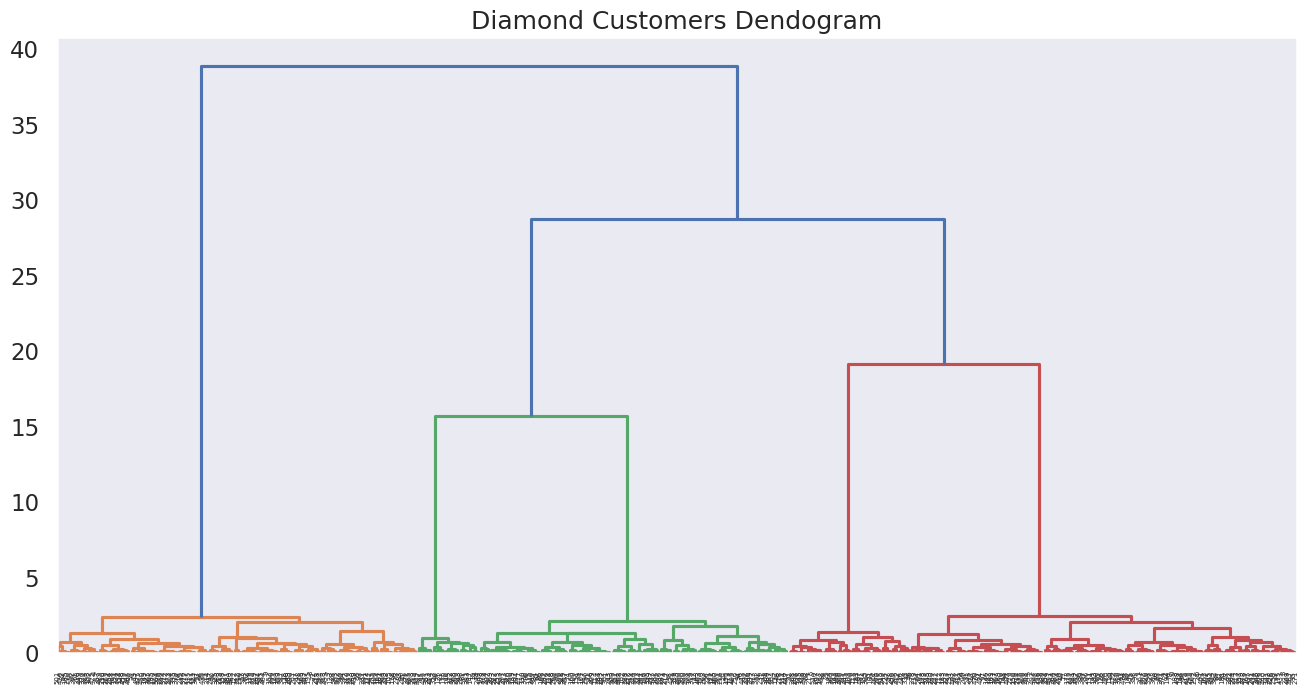

In [ ]:
import scipy.cluster

# Ward linkage is used to calculate the distance between the centroids of the clusters, using Euclidean distance.

aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Diamond Customers Dendogram");
dend = scipy.cluster.hierarchy.dendrogram(aggl);

The biggest drop in distance in the dendogram is seen roughly from 17 to 3, where 5 clusters is seen, which confirms the results from the Elbow Method above.



## 1.3 Model Comparison

The two clustering approaches have been evaluated on the following criteria:

*   **Interpretability:** Hierarchical clustering produces a dendogram, showing how the clusters merge and split, thus uncovering the relationships between the clusters, making it much more interpretable. Visualizing the cluster outputs is only possible using the K-Means approach if 2 variables are used for clustering. This makes hierarchical clustering a much more user-friendly and interpretable approach to unsupervised learning.   

*   **Flexibility:** The right number of clusters using the K-Means approach must be identified using the Elbow Method, where an elbow forms or where the silhouette score is maximized. This makes the number of clusters quite rigid using the K-Means approach and the number of clusters identified by this approach might not be useful from a business standpoint. The hierarchical approach is much more flexible and allows the number of clusters required, to be defined based on business need, making the clusters much more useful.

*   **Widely Applicable:** Hierarchical clustering also works with complex and non-linear data and work well with circular/non-circular data, which wouldn't be possible in the K-Means approach. The K-Means approach highly depends on the initialization of the centroids, whereas hierarchical clustering is robust to that.

*   **Data at Different Levels of Granularity:** The clusters can be viewed at different levels of hierarchy, i.e, granularity from the hierarchical clustering approach.

*   **Ease of Use:** Hierarchical clustering is a much easier algorithm to use than K-Means. The number of clusters can be defined based on business need, whereas using the K-Means approach, the number must be identified using a complex approach, which requires complex data science knowledge.

*   **Training Speed:** K-Means allows the training to happen much quicker than the hierarchical approach.

Hierarchical clustering, being more flexible, easy-to-use, robust to complex relationships and more interpretable, would be the more useful clustering approach to Uncle Steve, although it would take longer to train. Hierarchical clustering is more suited to the business need for this use case than the K-Means approach.

## 1.4 Personas

**Snake Plot**

In [ ]:
def snake_plot(data, cluster_label, model_name):

  X_df = pd.DataFrame(data, columns=features)
  X_df['Cluster'] = cluster_label
  X_df.head()

  X_df_melt = pd.melt(X_df,
      id_vars=['Cluster'],
      value_vars=['Age', 'Income', 'SpendingScore'],
      var_name='Feature',
      value_name='Value')

  graph_title = 'Snake Plot,' + model_name + ', K=5'

  plt.title(graph_title);
  sns.set(style="darkgrid")
  sns.set_context("talk")
  sns.lineplot(x="Feature", y="Value", hue='Cluster', data=X_df_melt, legend="full");
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

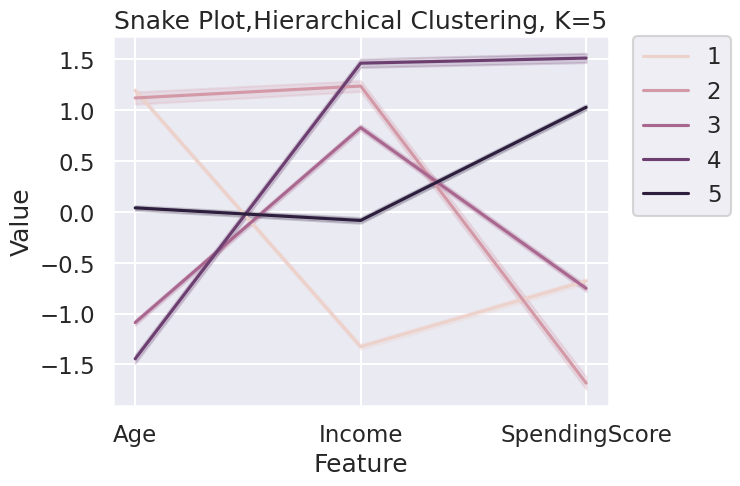

In [ ]:
snake_plot(X, labels, 'Hierarchical Clustering')

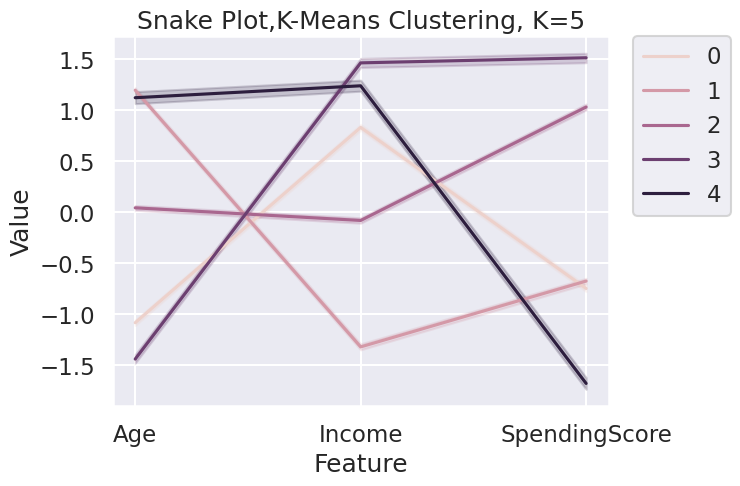

In [ ]:
snake_plot(X, k_means_results['Cluster'], 'K-Means Clustering')

The Snake plots stemming from the 2 clustering approaches are very similar and have very similar cluster outputs.

**Understanding Feature Stats for Each Cluster: K-Means**

In [ ]:
k_means_results_all_features.groupby(['Cluster'], as_index = False).agg({'Age' : ['mean', 'max', 'min'],
                                                                         'Income' : ['mean', 'max', 'min'],
                                                                         'SpendingScore' : ['mean', 'max', 'min'],
                                                                         'Savings' : ['mean', 'max', 'min']
                                                                         })

Cluster        Age                 Income                 SpendingScore  \
                mean max min           mean     max     min          mean   
0       0  32.777778  44  22  105265.809524  119877   89598      0.309926   
1       1  87.775510  97  79   27866.102041   46977   12000      0.328800   
2       2  59.955414  68  51   72448.063694   90422   56321      0.771518   
3       3  24.180000  31  17  128029.120000  142000  117108      0.896892   
4       4  86.000000  93  77  119944.040000  128596  110582      0.068378   

                            Savings                              
        max       min          mean           max           min  
0  0.411112  0.174120  14962.778066  17968.553929  12207.526078  
1  0.473550  0.203140  16659.261445  20000.000000  13470.970605  
2  0.910417  0.657314   6889.972190  10547.775368   4077.658657  
3  1.000000  0.806553   4087.520309   6089.478323      0.000000  
4  0.155694  0.000000  14808.683793  17833.093470  12554.692742

Clusters from K-Means Approach (Detailed Description below):

Cluster 0: Frugal, high income families -> Customers who do **NOT** buy jewelry despite having the income & savings to do so.

Cluster 1: Retired Occasional Buyers

Cluster 2: Loyal, Frequent buyers -> Customers who buy despite not having much income/savings

Cluster 3: Newly married / Engaged professionals

Cluster 4: Widowed



**Understanding Feature Stats for Each Cluster: Hierarchical**

In [ ]:
hierarchical_results_all_features.groupby(['Cluster'], as_index = False).agg({'Age' : ['mean', 'max', 'min'],
                                                                         'Income' : ['mean', 'max', 'min'],
                                                                         'SpendingScore' : ['mean', 'max', 'min'],
                                                                         'Savings' : ['mean', 'max', 'min']
                                                                         })

Cluster        Age                 Income                 SpendingScore  \
                mean max min           mean     max     min          mean   
0       1  87.775510  97  79   27866.102041   46977   12000      0.328800   
1       2  86.000000  93  77  119944.040000  128596  110582      0.068378   
2       3  32.777778  44  22  105265.809524  119877   89598      0.309926   
3       4  24.180000  31  17  128029.120000  142000  117108      0.896892   
4       5  59.955414  68  51   72448.063694   90422   56321      0.771518   

                            Savings                              
        max       min          mean           max           min  
0  0.473550  0.203140  16659.261445  20000.000000  13470.970605  
1  0.155694  0.000000  14808.683793  17833.093470  12554.692742  
2  0.411112  0.174120  14962.778066  17968.553929  12207.526078  
3  1.000000  0.806553   4087.520309   6089.478323      0.000000  
4  0.910417  0.657314   6889.972190  10547.775368   4077.658657

Clusters from Hierarchical Clustering Approach (Detailed Description below):

Cluster 1: Retired Occasional Buyers

Cluster 2: Widowed

Cluster 3: Frugal, high income families -> Customers who do **NOT** buy jewelry despite having the income & savings to do so.

Cluster 4: Newly married / Engaged professionals

Cluster 5: Loyal, Frequent buyers -> Customers who buy despite not having much income/savings

**Persona Analysis - Findings & Recommendations**

Using both clustering approaches, the customers at Uncle Steve's diamonds, can be segmented into 5 personas / clusters. Some segments show a high propensity to purchase jewelry and might be of benefit to Uncle Steve as the marketing team can engage them with targetted marketing messages.

**Frugal High Income Families:** These are customers with an adequate income & savings to buy diamonds, but they choose not to do so, and place more of an emphasis on saving.

**Retired Occasional Buyers:** These are customers who are retired and occasionally buy jewelry for their spouses, perhaps on big events, such as, birthdays & anniversaries.

**Loyal, Frequent Buyers:** These are customers who do not have a lot of income / savings, but frequent the jewelry store quite often and have an affinity for diamond jewelry. This group indexes high in their Spending Score, indicating they spend more money at the jewelry store, relative to other customer segments. This is a potential group that Uncle Steve could target with "always on" marketing campaigns, as these customers genuinely have an interest in diamond jewelry. This group could even represent diamond collectors!

**Newly Married / Engaged Professionals:** Newly married and engaged professionals are likely to frequent the jewelry store, to buy rings to propose to their partners with. They would also buy jewelry for their wedding. This group would also be of potential interest to Uncle Steve as they would frequent the jewelry store for their engagement & wedding. This group indexes the highest in their spending score and thus, demonstrates the greatest intent to buy.

**Widowed:** This group indexes really low in jewelry spend, although they have the income & savings to buy, indicating their spouses might have passed away. This group is unlikely to buy jewelry and Uncle Steve wouldn't benefit much from targetting them.
